<a href="https://colab.research.google.com/github/jinsusong/study-paper-review/blob/main/18_ELECTRA_Pre_training_Text_Encoders_as_Discriminators_Rather_Than_Generators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ELECTRA: Pre-training Text Encoders as Discriminators Rather Than Generators (ICLR)

- Efficiently
- Learning an
- Encoder that
- Classifies
- Token
- Replacements
- Accurately


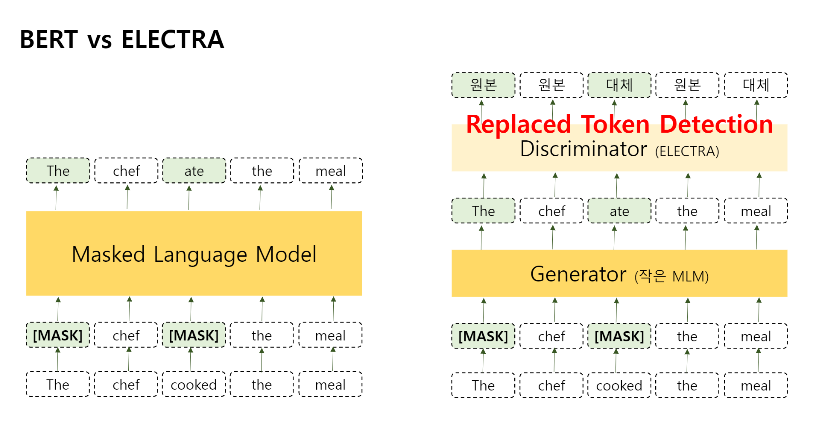

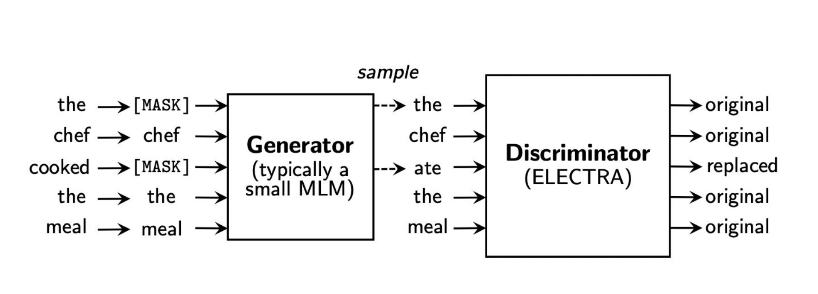

Generator 와 Discriminator 두가지로 나뉨 
1. [MASK] 한 input 값이 들어오면 sampleing 을 통해 MASK 를 예측하게 되고 
2. 이를 Discriminator의 input 값으로 넣어주면 원본인지 대체인지 판별한다. 



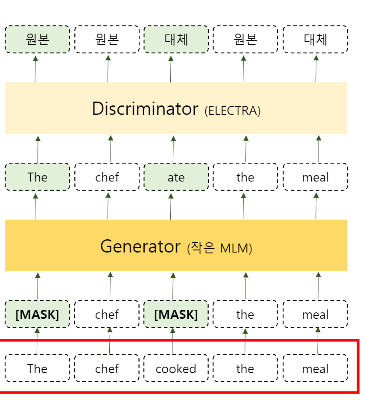

Generator 

1. input sequence x가 들어왔을 때 마스킹할 위치 m 을 랜덤하게 결정 
2. 마스킹된 토큰들은 [MASK] 토큰으로 대체 
3. 마스킹 된 입력 시퀀스 x에 대해서 generator는 원래 토큰이 무엇인지 예측


Discriminator 

1. Discriminator input 생성 - [MASK] 에서 샘플링한 토큰으로 치환 
2. Discriminator 는 x가 원본 입력 토큰과 동일한건지, Generator 가 만들어낸 것인지 예측 


학습방법

GAN vs ELECTRA

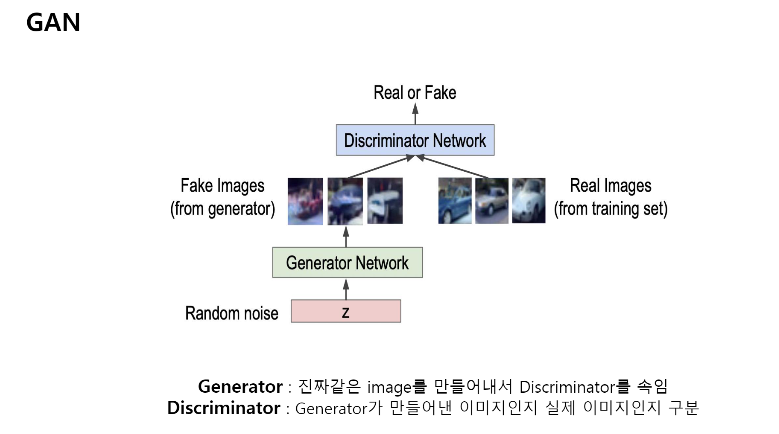


1.예측 차이점
- ELECTRA는 Generator 가 만들어낸 토큰이 원본 토큰과 동일할 경우 원본으로 판단 
- GAN은 Generator가 만들어낸 토큰이 원본 토큰과 동일하더라도 대체로 판단
- GAN은 각 토큰이 원본인지 아닌지가 아니라 Generator가 만든것인지 아닌지를 더 중요하게 판단함.

2. 학습 방법 차이점
- GAN : generator와 discriminator가 adversarial하게 학습 
- ELECTRA : generator와 discriminator가 각자 학습 

3. 입력 차이점
- GAN : Generator의 입력으로 노이즈 벡터를 넣음 
- ELECTRA : 노이즈 넣지 않음 




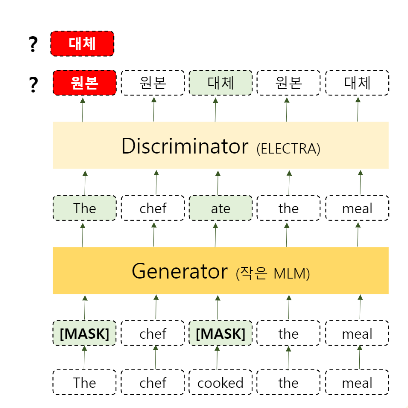

## EXPERIMENTS

1. Experiments : SETUP
    - GLUE - RTE, MNLI, QNLI, MRPC, QQP, STS, SST, and CoLA
    - SQuAD dataset 벤치마크
    - BERT와 동일한 사전학습 데이터셋으로 훈련
    - 모델 구조와 대부분의 하이퍼파라미터는 BERT와 동일
    - fine-tuning을 위해 간단한 linear classifiers 레이어 추가
    - fine-tuning시 작은 평가 데이터셋의 랜덤시드 의존성을 고려해 동일 체크포인트에서 평가의 정확도는 10회 중앙값 보고 

2. Experiments : MODEL EXTENSIONS
    - Weight Sharing
    - Smaller Generators
    - Training ALgorithms


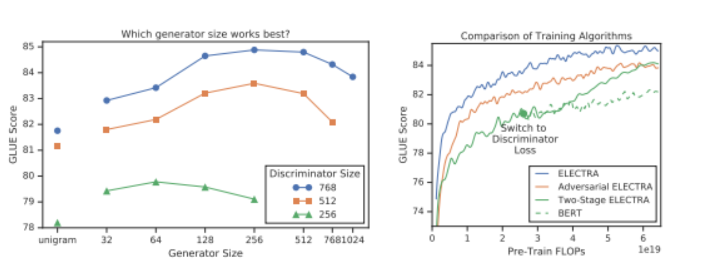

Training Algorithms

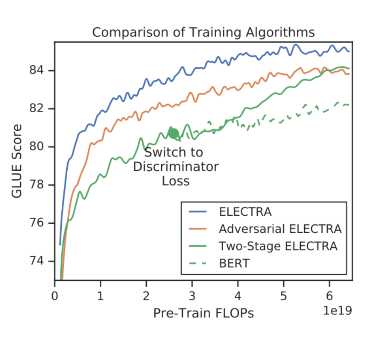

1. Adversarial Contrastive Esrimation
    - 강화 학습을 이용하여 생성 모델을 GAN과 같이 적대적인 방법으로 학습하는 방법
    - 생성모델에 대해 판별모델의 목적함수로 옮겨 갈 때 성능이 증가하였지만, 기존 방식 보다 성능 낮음.

2. Two-stage training
    1. n단계 동안 L LML G만 훈련
    2. 판별 모델의 weight를 생성 모델의 것으로 초기화하고, 생성모델의 가중치를 고정된 상태로 유지, 판별 모델만 n step 학습. 
    3. poor sample efficiency
    4. 생성 모델의 낮은 엔트로피 출력 분포 
    


## Efficiency Analysis 


1. ELECTRA 15% : 원래 ELECTRA와 동일하나, 판별 모델의 loss는 마스킹된 15%의 토큰에서 온 것만을 사용

2. Replace MLM : MLM과 비슷하지만, 마스킹된 토큰 [MASK]를 인풋으로 받는 대신, 생성모델이 만들어낸 토큰으로 대체하여 MLM을 진행

3. All-Tokens MLM : BERT와 ELECTRA를 합친 것으로 mask된 코큰이 아닌 모든 토큰을 예측하는 모델 

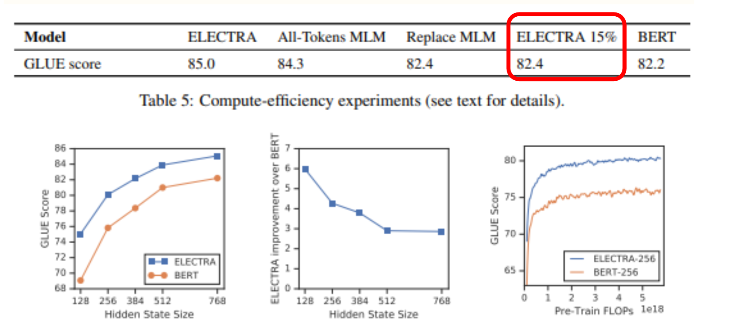

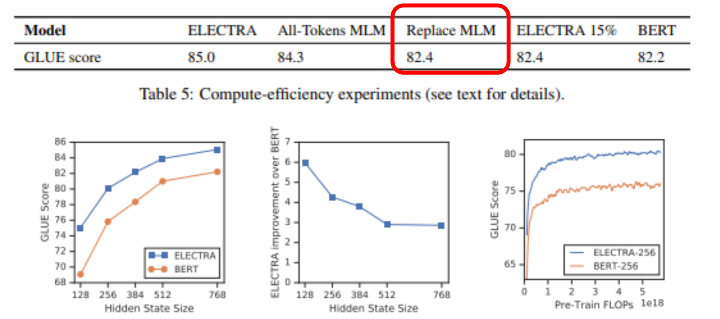

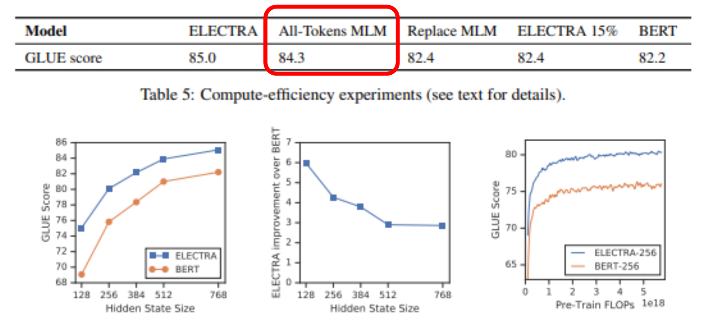

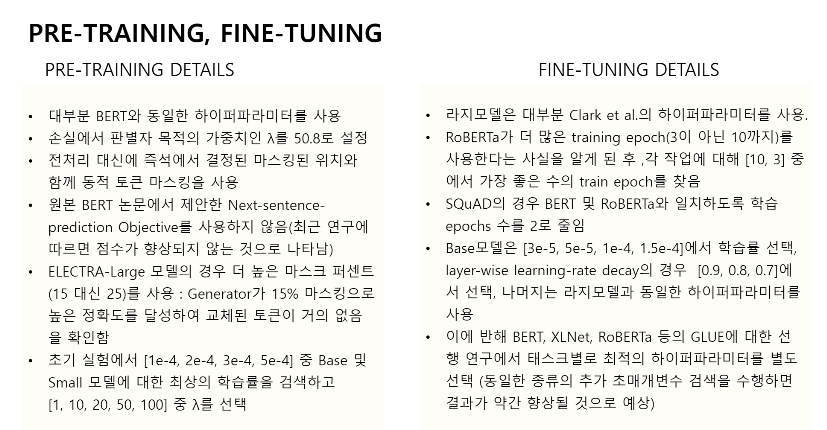

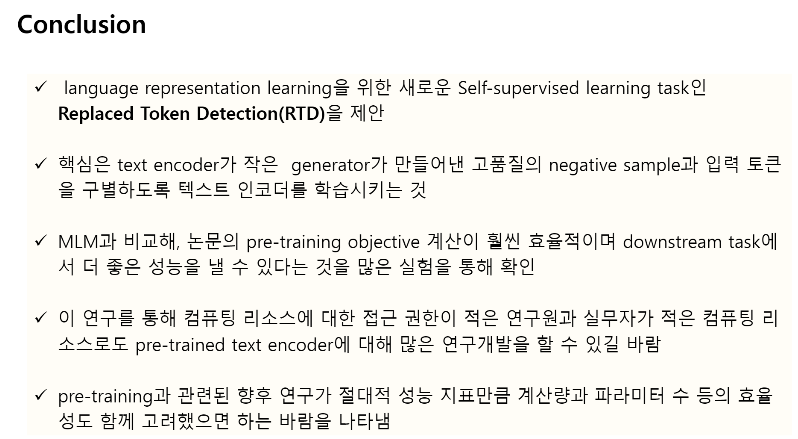

출처 : https://www.youtube.com/watch?v=LDHsL3tZewY